## PRE PROCESSING sklearn.preprocessing

### TRANSFORMER

In [50]:
# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
X = np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])

In [3]:
transformer = LabelEncoder()

# méthode fit() qui permet de développer une fonction de transformation en
# analysant les données du Train set
transformer.fit(X)

LabelEncoder()

In [4]:
# une méthode transforme() qui permet d'appliquer  cette focntion de
# transformation sur toutes les données qu'on lui fournit
# c'est-à dire aussi bien les données du Train set que les données du 
# test set ou bien les données futures
transformer.transform(X)

array([0, 1, 0, 2], dtype=int64)

In [5]:
#  une 3ième méthode combine fit et transforme
transformer = LabelEncoder()
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

### pre-processing : ENCODAGE

### LabelEncoder

In [8]:
# chargement des librairies
import numpy as n
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder

In [10]:
y = np.array(['chat','chien','chat','oiseau'])

In [12]:
encoder = LabelEncoder()
# développer l'encodeur : fit sur le tableau y
encoder.fit(y)
# cela nous retourne une fonction de transformation

LabelEncoder()

In [13]:
#  on peut alors utiliser le tranformer pour traiter les données
encoder.transform(y)

array([0, 1, 0, 2], dtype=int64)

In [14]:
#  on peut pour aller plus vite, utiliser fit-transform
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [15]:
#  il existe une méthode de décodage : inverse enconding
encoder.inverse_transform(np.array([0, 0, 2, 1, 2]))

array(['chat', 'chat', 'oiseau', 'chien', 'oiseau'], dtype='<U6')

### OrdinalEncoder

In [20]:
# pour utiliser un encodeur pour plusieurs variables : OrdinalEncoder

In [28]:
X = np.array([['Chat','Poils'],
              ['Chien','Poils'],
              ['Chat','Poils'],
              ['Oiseau', 'Plumes']])

In [29]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

## ENCODAGE ONE-HOT

### LabelBinarizer

In [30]:
y = np.array(['chat','chien','chat','oiseau'])

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [31]:
# pour compresser le résultat
y = np.array(['chat','chien','chat','oiseau'])

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)
# obtient une matrice (4*3) compressée en CSR

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

### ONeHotEncoder

In [32]:
X = np.array([['Chat','Poils'],
              ['Chien','Poils'],
              ['Chat','Poils'],
              ['Oiseau', 'Plumes']])

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit_transform(X)
# obtient une matrice (4*5) compressée en CSR

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## NORMALISATION

### Normalisation MinMaxScaler sensible outliers

In [41]:
from sklearn.preprocessing import MinMaxScaler
X = np.array([[70],
              [80],
              [120]])

In [42]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [38]:
#  on ne perd aucune information car les normalisations ont conservées
# les rapports de distance

In [43]:
# il faut utiliser la même transformation sur X_test pour une nouvelle
# caatégorie
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

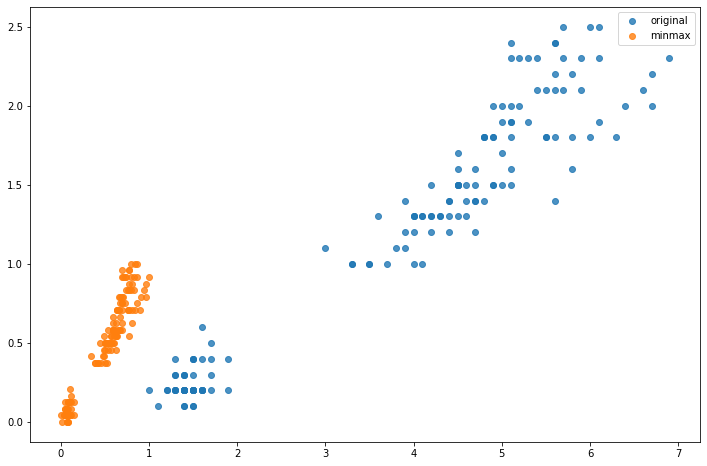

In [56]:
# exemple de MinMaxSCaler sur le dataset des fleurs d'iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

# normalisation des données :
X_minmax = MinMaxScaler().fit_transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,2],X[:,3], label='original', alpha=0.5)
# données normalisées toutes entre 0 et 1
plt.scatter(X_minmax[:,2],X_minmax[:,3], label='minmax', alpha=0.5)
plt.legend()
plt.show()

### STANDARDISATION

In [57]:
# standardisation = normalisation en transformant les données de telle 
# sorte que chaque variable est une moyenne de 0 et un écart type de 1

### StandardScaler : sensible aux outliers

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
X = np.array([[70],
              [80],
              [120]])

In [60]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

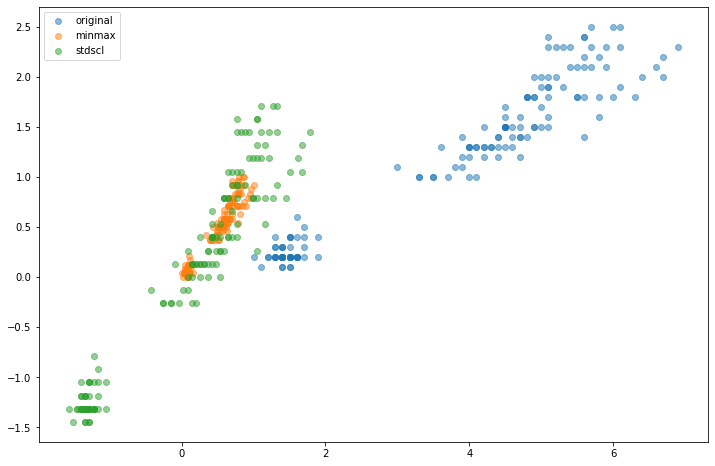

In [61]:
# Comparaison de MinMaxSCaler/ StandardScaler sur le dataset 
# des fleurs d'iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

# normalisation des données :
X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,2],X[:,3], label='original', alpha=0.5)
# données normalisées toutes entre 0 et 1
plt.scatter(X_minmax[:,2],X_minmax[:,3], label='minmax', alpha=0.5)
#  standardscaler
plt.scatter(X_stdscl[:,2],X_stdscl[:,3], label='stdscl', alpha=0.5)
plt.legend()
plt.show()

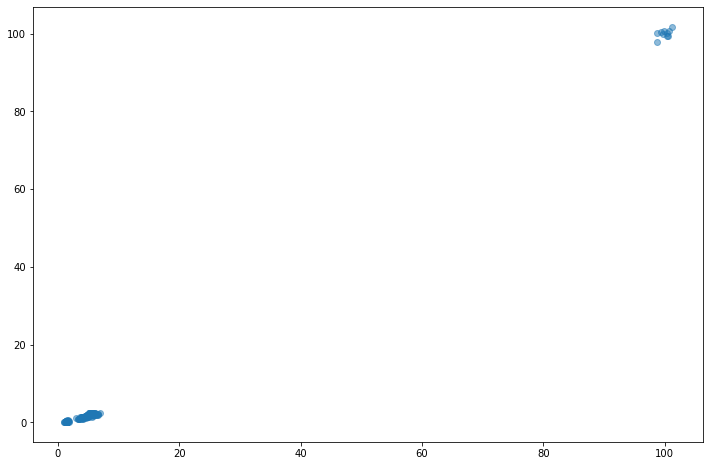

In [62]:
#  GROS INCONVENIENT : sensible aux outliers
# Comparaison de MinMaxSCaler/ StandardScaler sur le dataset 
# des fleurs d'iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data


outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

# normalisation des données :
# X_minmax = MinMaxScaler().fit_transform(X)
# X_stdscl = StandardScaler().fit_transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,2],X[:,3], label='original', alpha=0.5)
# données normalisées toutes entre 0 et 1
# plt.scatter(X_minmax[:,2],X_minmax[:,3], label='minmax', alpha=0.5)
#  standardscaler
# plt.scatter(X_stdscl[:,2],X_stdscl[:,3], label='stdscl', alpha=0.5)
# plt.legend()
plt.show()

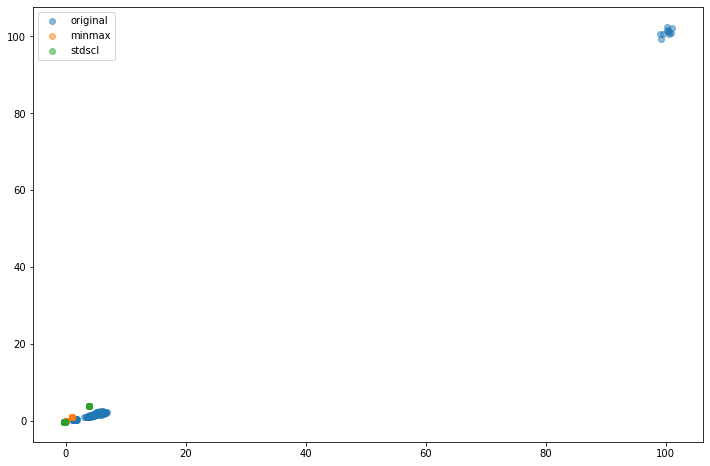

In [63]:
# si on passe la normalisation :
#  GROS INCONVENIENT : sensible aux outliers
# Comparaison de MinMaxSCaler/ StandardScaler sur le dataset 
# des fleurs d'iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data


outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

# normalisation des données :
X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:,2],X[:,3], label='original', alpha=0.5)
# données normalisées toutes entre 0 et 1
plt.scatter(X_minmax[:,2],X_minmax[:,3], label='minmax', alpha=0.5)
#  standardscaler
plt.scatter(X_stdscl[:,2],X_stdscl[:,3], label='stdscl', alpha=0.5)
plt.legend()
plt.show()
#  impossible à exploiter les données car trop serrées, écrasées

## RobustScaler : non sensible outlier

In [64]:
from sklearn.preprocessing import RobustScaler

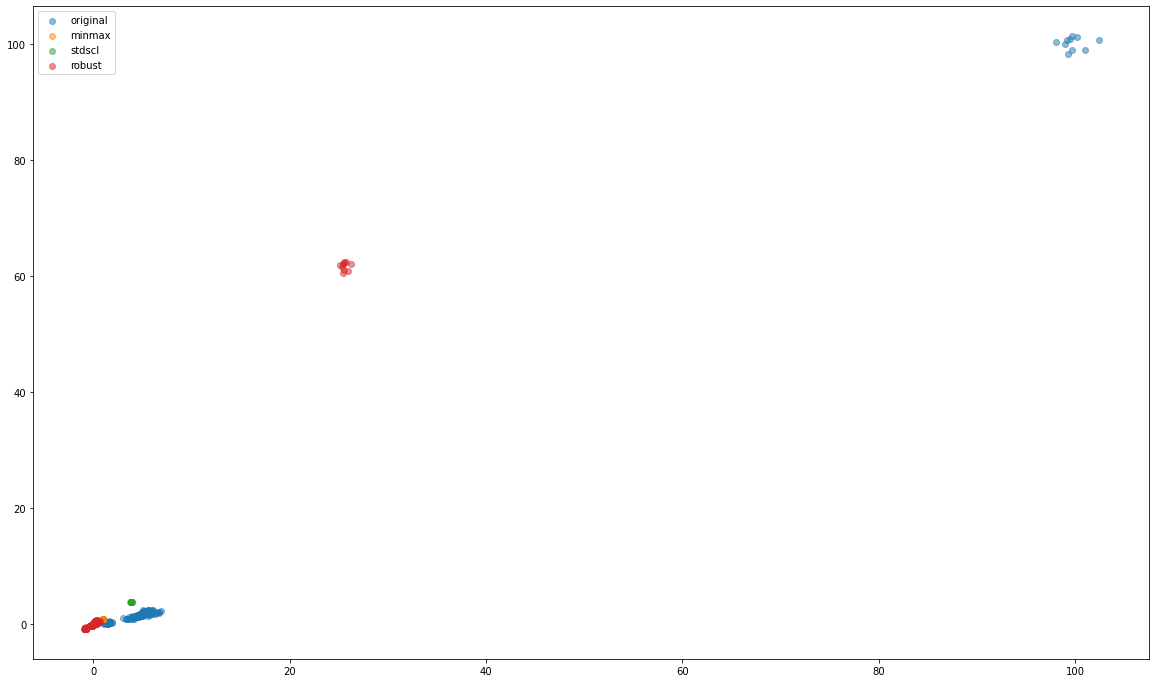

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data


outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

# normalisation des données :
X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.figure(figsize=(20,12))
plt.scatter(X[:,2],X[:,3], label='original', alpha=0.5)
# données normalisées toutes entre 0 et 1
plt.scatter(X_minmax[:,2],X_minmax[:,3], label='minmax', alpha=0.5)
#  standardscaler
plt.scatter(X_stdscl[:,2],X_stdscl[:,3], label='stdscl', alpha=0.5)
#  robustScaler
plt.scatter(X_robust[:,2],X_robust[:,3], label='robust', alpha=0.5)
#  moins reserrer ==> plus facile à exploiter
plt.legend()
plt.show()

## POLYNOMIALFEATURES

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
X = np.array([[1],
              [2],
               [0.5]])

In [71]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

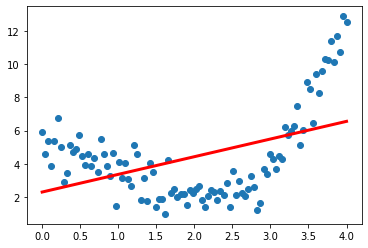

In [74]:
# linearRegression pas adaptée
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

plt.scatter(X, y)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y_pred, c='r', lw=3)
plt.show()
# la courbe de prédiction ne suit pas le nuage de points

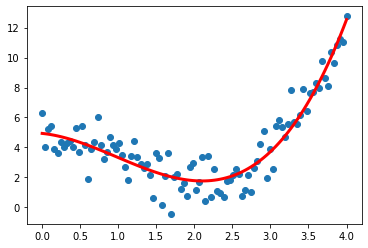

In [76]:
# linearRegression pas adaptée==> voir ploynomialfaeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

# variables polynomiale d'un degré 3
X_poly = PolynomialFeatures(3).fit_transform(X)

plt.scatter(X, y)

# model = LinearRegression().fit(X, y)
model = LinearRegression().fit(X_poly, y)
# y_pred = model.predict(X)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, c='r', lw=3)
plt.show()
# le résultat est bien plus satisfaisant suit la courbe

## POWER TRANSFORMER

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

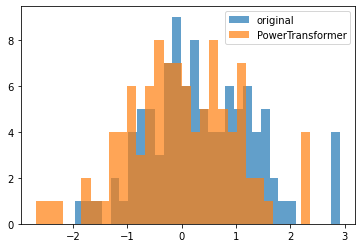

In [78]:
np.random.seed(0)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

X2 = PowerTransformer().fit_transform(X)

plt.hist(X[:,0], bins=30, alpha=0.7, label='original')
# distribution plus normale ou gaussienne
plt.hist(X2[:,0], bins=30, alpha=0.7, label='PowerTransformer')
plt.legend()
plt.show()


## DISCRETISATION

In [87]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [80]:
# X de 0 à 5
X = np.linspace(0, 5, 10).reshape((10, 1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

### BINARIZER

In [83]:
# seuil défini à 3 : tout ce qui est inf à 3 transformé en  0 et sup en 1
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

### KBINSDISCRETIZER

In [90]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

### FUNCTIONTRANSFORMER

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

In [92]:
X = np.linspace(1, 5, 10).reshape((-1, 1))

In [94]:
Mon_transformer = FunctionTransformer(func= np.log1p,
                                     inverse_func = np.expm1)
Mon_transformer.fit_transform(X)

array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

## EXEMPLE TRANSFORMER ESTIMATOR

In [100]:
# chargement des librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [98]:
# Chargement du dataset
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [99]:
#  division du dataset en plusieurs parties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
# on créé un transformeur par ex : StandardSCaler
scaler = StandardScaler()
# e transformeur nous sert à traiter les données X_train
X_train_transformed = scaler.fit_transform(X_train)

In [104]:
# on développe notre estimateur
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

SGDClassifier(random_state=0)

In [105]:
# on utilise le modèle pour faire des prédictions
#  1. trnsformer le x_test set à l'aid du scaler
X_test_transformed = scaler.transform(X_test)
# 2.injecter ces données transformées dans la méthode predict du modèle
model.predict(X_test_transformed)

array([2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 2, 0])

In [106]:
# on peut écrire ce code plus simplement
# ASTUCE :  regrouper transformer et estimateur dans un PIPELINE
# on obtient un estimateur composite

## PIPELINE

In [109]:
# chargement des librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

In [110]:
# Chargement du dataset
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [111]:
#  division du dataset en plusieurs parties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
# créé un model
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)

array([1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 0])

## PIPELINE ET GRIDSEARCH

In [114]:
from sklearn.model_selection import GridSearchCV

In [116]:
model = make_pipeline(PolynomialFeatures(), StandardScaler(),
                     SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [119]:
params  = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'sgdclassifier__penalty' : ['l1', 'l2']
}

In [120]:
grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [122]:
grid.best_score_ # 97.5%

0.9750000000000001

In [123]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'sgdclassifier__penalty': 'l1'}

In [124]:
#  sans avoir utilisé les pipelines, combien de score?

In [126]:
# Chargement du dataset
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

#  division du dataset en plusieurs parties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# créé un model
model = SGDClassifier(random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test) # 86%

0.8